# Introduction
Goal of this notebook is to make a model which can predict the mass of an object based on color intensities of an images.

Synthetic images are created. The color/value of each pixel represent the pressure on that position. 

In [1]:
import cv2
import random
from PIL import Image
import os 
import pandas as pd 
import skimage
from train import train


: 

: 

# Synthetic images

In [2]:
def gaussian_kernel(size, size_y=None):
    size = int(size)
    if not size_y:
        size_y = size
    else:
        size_y = int(size_y)
    x, y = np.mgrid[-size:size+1, -size_y:size_y+1]
    g = np.exp(-(x**2/float(size)+y**2/float(size_y)))
    return g / g.sum()

def create_img(x,y,w,h,mass,gaussian_x,guassian_y):
    data = locals()
    # f should be max 1. So min area = 10*20 and max weight = 1000 so divide by 5
    img = np.zeros((224,224))
    f = mass/(w*h) / 2.5 
    img[x:x+w,y:y+h] = f
    
    # use 2d gaussian filter to mimick the effect of an tire 
    gaussian_kernel_array = gaussian_kernel(gaussian_x,gaussian_y)
    img_filt= cv2.filter2D(img,-1,gaussian_kernel_array)

    # add random noise to make it more a reallife situation 
    img_noise = skimage.util.random_noise(img_filt, mode='gaussian',clip=True,var=.0005)
    img_noise[img_noise<0] = 0
    
    return img_noise,data

all_data = []
os.makedirs('images',exist_ok=True)
for i in range(0,3000):
    filename = f'images/{i}.jpg'
    
    # create rectangles with random shape and position
    x = random.randint(50, 175)
    y = random.randint(50, 175)
    h = random.randint(20,25)
    w = int(h*(random.random()+1))

    gaussian_x = random.randint(4, 12)
    gaussian_y = random.randint(10, 30)
    mass = random.randint(200,1000)

    result,data = create_img(x,y,w,h,mass,gaussian_x,gaussian_y)
    data['filename'] = filename
    all_data.append(data)
    img = Image.fromarray(np.uint8(result * 255) , 'L')
    img.save(filename)

df = pd.DataFrame(all_data)
df.to_csv('data.csv')

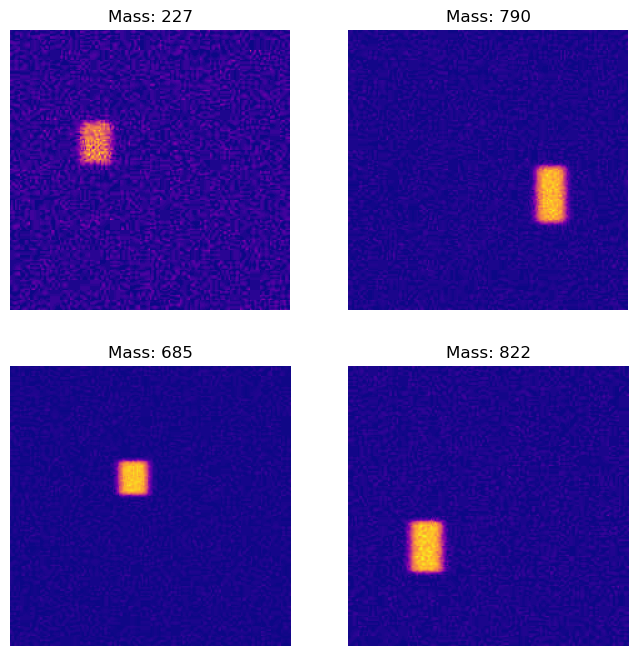

In [4]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 2, 2

for i in range(1, cols * rows + 1):
    img = Image.open(df.filename.iloc[i])
    figure.add_subplot(rows, cols, i)
    plt.title(f'Mass: {df.mass.iloc[i]}')
    plt.axis("off")
    plt.imshow(img, cmap="plasma")
plt.show()
figure.savefig('overview.png')

# Train Model

In [26]:
filename = train(0.001,num_epochs=40)

Start epochs


100%|██████████| 4/4 [00:11<00:00,  2.78s/it]


Epoch 1/40, Duration: 34.071211099624634, Loss: 397763.8750, Validation Loss: 413806.5938,


100%|██████████| 4/4 [00:00<00:00,  4.88it/s]


Epoch 2/40, Duration: 12.704745054244995, Loss: 429226.5000, Validation Loss: 441755.9062,


100%|██████████| 4/4 [00:00<00:00,  5.29it/s]


Epoch 3/40, Duration: 12.010658740997314, Loss: 389660.6562, Validation Loss: 411291.3438,


100%|██████████| 4/4 [00:00<00:00,  4.99it/s]


Epoch 4/40, Duration: 12.007885932922363, Loss: 322881.5938, Validation Loss: 328375.5938,


100%|██████████| 4/4 [00:00<00:00,  5.06it/s]


Epoch 5/40, Duration: 11.94371509552002, Loss: 367138.6875, Validation Loss: 366051.7188,


100%|██████████| 4/4 [00:00<00:00,  5.52it/s]


Epoch 6/40, Duration: 11.775883913040161, Loss: 281873.3438, Validation Loss: 253315.9062,


100%|██████████| 4/4 [00:00<00:00,  4.68it/s]


Epoch 7/40, Duration: 11.96298599243164, Loss: 268215.7188, Validation Loss: 359368.7188,


100%|██████████| 4/4 [00:00<00:00,  5.22it/s]


Epoch 8/40, Duration: 11.906884908676147, Loss: 255090.2344, Validation Loss: 217640.7500,


100%|██████████| 4/4 [00:00<00:00,  5.21it/s]


Epoch 9/40, Duration: 11.716115951538086, Loss: 262120.2344, Validation Loss: 271326.0938,


100%|██████████| 4/4 [00:00<00:00,  4.88it/s]


Epoch 10/40, Duration: 11.861850023269653, Loss: 218871.8281, Validation Loss: 247856.2344,


100%|██████████| 4/4 [00:00<00:00,  4.68it/s]


Epoch 11/40, Duration: 13.116357803344727, Loss: 168670.1562, Validation Loss: 185680.8281,


100%|██████████| 4/4 [00:00<00:00,  5.34it/s]


Epoch 12/40, Duration: 11.914902210235596, Loss: 169522.6719, Validation Loss: 180992.5781,


100%|██████████| 4/4 [00:00<00:00,  5.37it/s]


Epoch 13/40, Duration: 11.860390901565552, Loss: 154517.4844, Validation Loss: 184120.1562,


100%|██████████| 4/4 [00:00<00:00,  5.43it/s]


Epoch 14/40, Duration: 11.946983814239502, Loss: 131789.6250, Validation Loss: 106846.5547,


100%|██████████| 4/4 [00:00<00:00,  5.24it/s]


Epoch 15/40, Duration: 11.938364028930664, Loss: 116769.5781, Validation Loss: 113335.4766,


100%|██████████| 4/4 [00:00<00:00,  5.40it/s]


Epoch 16/40, Duration: 12.00502324104309, Loss: 95352.8672, Validation Loss: 99825.1250,


100%|██████████| 4/4 [00:00<00:00,  5.34it/s]


Epoch 17/40, Duration: 11.92398715019226, Loss: 87546.4141, Validation Loss: 67029.5859,


100%|██████████| 4/4 [00:00<00:00,  5.29it/s]


Epoch 18/40, Duration: 11.808434963226318, Loss: 70173.9922, Validation Loss: 26216.5215,


100%|██████████| 4/4 [00:00<00:00,  5.26it/s]


Epoch 19/40, Duration: 11.797729015350342, Loss: 48070.1406, Validation Loss: 29801.0879,


100%|██████████| 4/4 [00:00<00:00,  5.26it/s]


Epoch 20/40, Duration: 11.83924913406372, Loss: 32559.4883, Validation Loss: 54592.7148,


100%|██████████| 4/4 [00:00<00:00,  5.45it/s]


Epoch 21/40, Duration: 11.740059852600098, Loss: 29342.7012, Validation Loss: 34692.5781,


100%|██████████| 4/4 [00:00<00:00,  5.26it/s]


Epoch 22/40, Duration: 11.777683973312378, Loss: 19989.9355, Validation Loss: 15154.1250,


100%|██████████| 4/4 [00:00<00:00,  5.24it/s]


Epoch 23/40, Duration: 11.77519679069519, Loss: 19243.3652, Validation Loss: 18117.5840,


100%|██████████| 4/4 [00:00<00:00,  5.44it/s]


Epoch 24/40, Duration: 11.814523220062256, Loss: 13170.9004, Validation Loss: 23789.0840,


100%|██████████| 4/4 [00:00<00:00,  5.31it/s]


Epoch 25/40, Duration: 11.944742918014526, Loss: 9059.3271, Validation Loss: 8338.4268,


100%|██████████| 4/4 [00:00<00:00,  5.26it/s]


Epoch 26/40, Duration: 11.8749098777771, Loss: 17127.2246, Validation Loss: 8781.8271,


100%|██████████| 4/4 [00:00<00:00,  5.36it/s]


Epoch 27/40, Duration: 11.759994268417358, Loss: 3425.4617, Validation Loss: 6610.3008,


100%|██████████| 4/4 [00:00<00:00,  5.35it/s]


Epoch 28/40, Duration: 11.813666105270386, Loss: 15796.5859, Validation Loss: 1041.0940,


100%|██████████| 4/4 [00:00<00:00,  5.25it/s]


Epoch 29/40, Duration: 11.770211935043335, Loss: 1451.6399, Validation Loss: 627.1772,


100%|██████████| 4/4 [00:00<00:00,  5.10it/s]


Epoch 30/40, Duration: 11.739973783493042, Loss: 2666.0540, Validation Loss: 769.0510,


100%|██████████| 4/4 [00:00<00:00,  5.41it/s]


Epoch 31/40, Duration: 11.8993239402771, Loss: 1723.6406, Validation Loss: 13327.0830,


100%|██████████| 4/4 [00:00<00:00,  5.26it/s]


Epoch 32/40, Duration: 11.907713651657104, Loss: 3725.1074, Validation Loss: 2169.0876,


100%|██████████| 4/4 [00:00<00:00,  5.36it/s]


Epoch 33/40, Duration: 11.806071043014526, Loss: 727.4912, Validation Loss: 2172.8997,


100%|██████████| 4/4 [00:00<00:00,  5.36it/s]


Epoch 34/40, Duration: 11.733455181121826, Loss: 1133.2457, Validation Loss: 258.1661,


100%|██████████| 4/4 [00:00<00:00,  4.91it/s]


Epoch 35/40, Duration: 12.09249210357666, Loss: 545.4564, Validation Loss: 270.1922,


100%|██████████| 4/4 [00:00<00:00,  5.29it/s]


Epoch 36/40, Duration: 11.909476041793823, Loss: 201.8511, Validation Loss: 153.2314,


100%|██████████| 4/4 [00:00<00:00,  5.27it/s]


Epoch 37/40, Duration: 11.976668119430542, Loss: 1297.6581, Validation Loss: 976.0822,


100%|██████████| 4/4 [00:00<00:00,  5.42it/s]


Epoch 38/40, Duration: 11.69138216972351, Loss: 2736.2683, Validation Loss: 846.3358,


100%|██████████| 4/4 [00:00<00:00,  5.26it/s]


Epoch 39/40, Duration: 11.675603866577148, Loss: 1902.1487, Validation Loss: 719.5214,


100%|██████████| 4/4 [00:00<00:00,  5.31it/s]


Epoch 40/40, Duration: 11.628350973129272, Loss: 635.6454, Validation Loss: 770.0138,
Finished Training, Best validation Loss: 153.2314


# Test Model 

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from dataset import CustomImageDataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

model = torch.load(filename)

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Test on data which hasn't been seen by  model 
df = pd.read_csv('data.csv').iloc[2000:2500] # not in train or validation 

test_dataset = CustomImageDataset(df[['filename','mass']],'.',transform=transform)

loader = torch.utils.data.DataLoader(test_dataset, batch_size=64)

model.eval()
all = np.empty((0,))
for inputs,labels in loader:
    with torch.no_grad():
        inputs = inputs.to('mps')
        output = model(inputs).cpu().detach().numpy().squeeze()
        all= np.append(all, output, axis=0)
    
diff = df.mass - all



### Root mean square error

In [2]:
print(f'RMSE: {np.mean(diff**2)**.5}')

RMSE: 12.632347488820296


### Visualize results

Text(0.5, 0, 'True Mass [kg]')

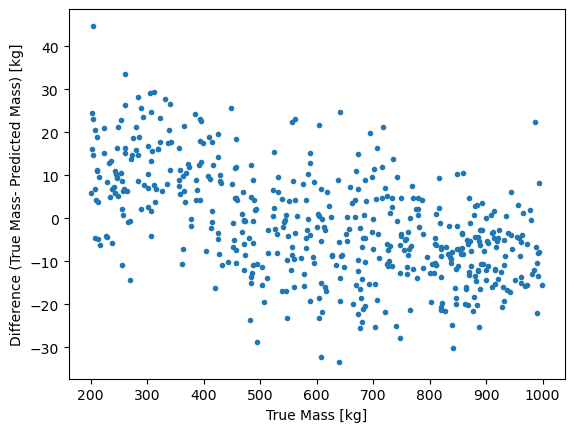

In [3]:
plt.plot(df.mass,diff,'.')
plt.ylabel('Difference (True Mass- Predicted Mass) [kg]')
plt.xlabel('True Mass [kg]')

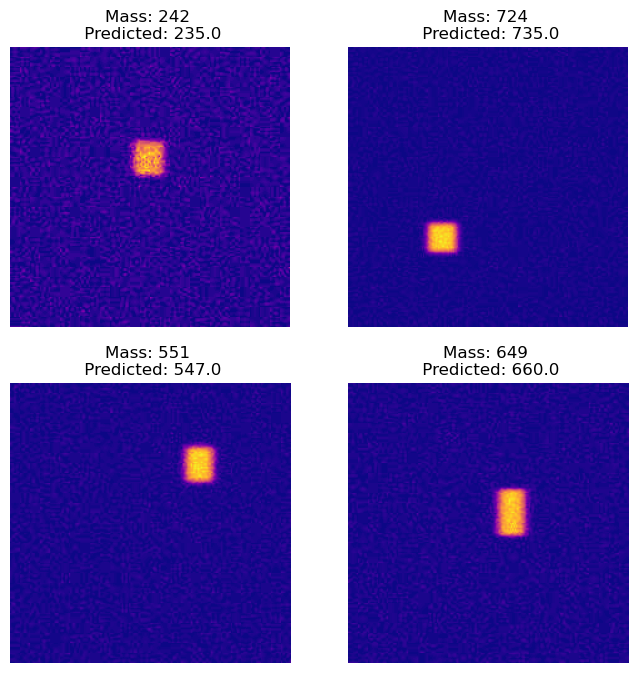

In [9]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 2, 2

for i in range(1, cols * rows + 1):
    img = Image.open(df.filename.iloc[i])
    figure.add_subplot(rows, cols, i)
    plt.title(f'Mass: {df.mass.iloc[i]} \n Predicted: {round(all[i],0)}')
    plt.axis("off")
    plt.imshow(img, cmap="plasma")
plt.show()
figure.savefig('overview_result.png')
